# Explanatory Data Analysis - Terrorism
## Name :- Shobhan Akshay Giridharan
## Task :- 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected = True)
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", low_memory = False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
#replacing column names according to the right preference
df.rename(columns = { 'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

In [6]:
#keeping only required columns rest we ignore

df1 = df[['Eventid', 'Year', 'Month', 'Day', 'Extended', 'Resolution', 'Attacktype', 'Country', 'Region', 'Provstate', 'City', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound', 'Success', 'Suicide', 'Crit1', 'Crit2', 'Crit3']]

In [7]:
df1.head()

,Eventid,Year,Month,Day,Extended,Resolution,Attacktype,Country,Region,Provstate,...,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Success,Suicide,Crit1,Crit2,Crit3
0,197000000001,1970,7,2,0,NaN,Assassination,Dominican Republic,Central America & Caribbean,NaN,...,0.0,NaN,Unknown,1.0,0.0,1,0,1,1,1
1,197000000002,1970,0,0,0,NaN,Hostage Taking (Kidnapping),Mexico,North America,Federal,...,0.0,NaN,Unknown,0.0,0.0,1,0,1,1,1
2,197001000001,1970,1,0,0,NaN,Assassination,Philippines,Southeast Asia,Tarlac,...,0.0,NaN,Unknown,1.0,0.0,1,0,1,1,1
3,197001000002,1970,1,0,0,NaN,Bombing/Explosion,Greece,Western Europe,Attica,...,0.0,NaN,Explosives,NaN,NaN,1,0,1,1,1
4,197001000003,1970,1,0,0,NaN,Facility/Infrastructure Attack,Japan,East Asia,Fukouka,...,0.0,NaN,Incendiary,NaN,NaN,1,0,1,1,1


In [9]:
df_country = df1['Country']

In [10]:
df1['Country'].value_counts().head(20)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [28]:
print("The Country having highest number of Terror Attacks: {}".format(df['Country'].value_counts().index[0]))

The Country having highest number of Terror Attacks: Iraq


In [29]:
print("The regions having highest number of terrorist attacks: {}".format(df['Region'].value_counts().index[0]))

The regions having highest number of terrorist attacks: Middle East & North Africa


In [39]:
print("The maximum number of terrorists killed in a single Terrorist Attack are: {}".format(df['Nkill'].max()))

The maximum number of terrorists killed in a single Terrorist Attack are: 1570.0


In [40]:
df1.corr()

,Eventid,Year,Month,Day,Extended,Guncertain1,Claimed,Nkill,Nwound,Success,Suicide,Crit1,Crit2,Crit3
Eventid,1.000000,0.999996,0.002706,0.018336,0.091761,0.040647,0.141600,0.015351,0.015282,-0.082972,0.137743,0.002019,0.026215,-0.016789
Year,0.999996,1.000000,0.000139,0.018254,0.091754,0.040656,0.141486,0.015341,0.015273,-0.082963,0.137736,0.001995,0.026211,-0.016784
Month,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.004460,0.023083,0.003463,0.002938,-0.002845,0.003071,0.001568,0.001734,0.000176
Day,0.018336,0.018254,0.005497,1.000000,-0.004700,-0.002186,0.004474,-0.003693,-0.001268,-0.011802,0.003593,0.011434,-0.002702,-0.004889
Extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,0.033464,0.006779,0.027737,-0.006627,0.073233,-0.033961,-0.015029,0.001249,0.048533
Guncertain1,0.040647,0.040656,-0.004460,-0.002186,0.033464,1.000000,-0.042083,0.004043,0.008971,0.024725,-0.000819,0.013568,-0.003619,0.057764
Claimed,0.141600,0.141486,0.023083,0.004474,0.006779,-0.042083,1.000000,0.014038,0.004992,-0.005985,0.035791,0.006403,0.005675,-0.047356
Nkill,0.015351,0.015341,0.003463,-0.003693,0.027737,0.004043,0.014038,1.000000,0.534375,0.053115,0.136086,0.010834,-0.019506,-0.056952
Nwound,0.015282,0.015273,0.002938,-0.001268,-0.006627,0.008971,0.004992,0.534375,1.000000,0.025804,0.099525,0.006790,-0.002209,0.007281
Success,-0.082972,-0.082963,-0.002845,-0.011802,0.073233,0.024725,-0.005985,0.053115,0.025804,1.000000,-0.031155,-0.010733,-0.013476,-0.013678


<AxesSubplot:>

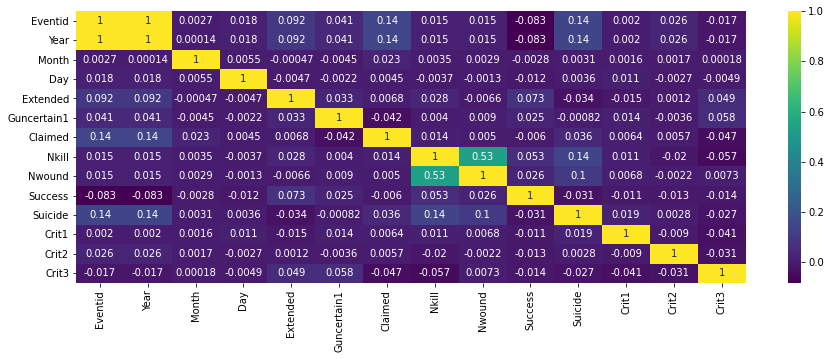

In [51]:
plt.figure(figsize = (15, 5))
sns.heatmap(df1.corr(), cmap = 'viridis', annot = True)

Text(0.5, 1.0, 'Number of attacks happening yearly')

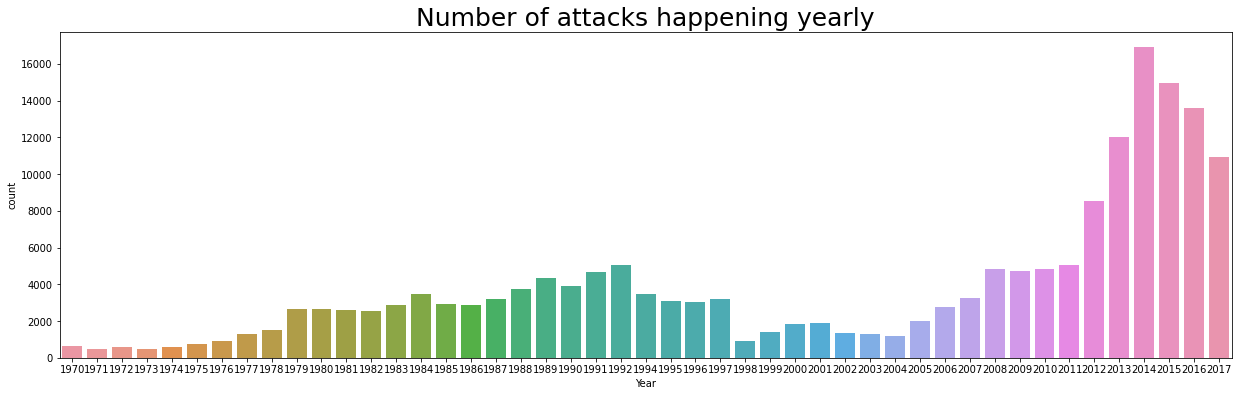

In [69]:
#lets see how much events happend in these many years

plt.figure(figsize = (21, 6))
sns.countplot(df1['Year'])
plt.title("Number of attacks happening yearly", fontsize = 25)

**Highest Terrorist Events occurred in the year 2014 followed by 2015 and 2016 years respectively.**

## Country wise observation of terror attacks.

In [73]:
df_country = df['Country'].value_counts()
df_country.head(20)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

Text(0.5, 1.0, 'Country-wise observation of terror attacks')

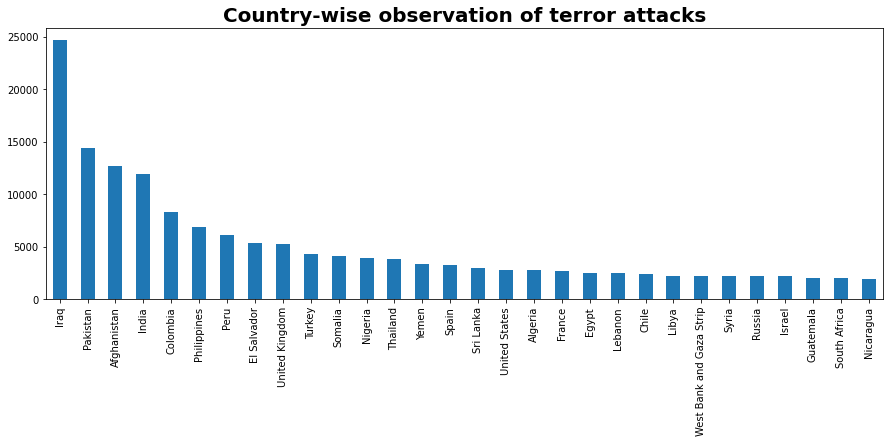

In [107]:
plt.figure(figsize = (15, 5))
df_country.head(30).plot(kind = 'bar')
plt.title('Country-wise observation of terror attacks', fontsize = 20, weight = 'bold')

**From the above plot, we can observe that highest attacks have been taken place in Iraq, moderate in Afghanistan and lowest in Nicaragua.**

## Region wise observation of attacks.

In [99]:
df_region = df1['Region'].value_counts()
df_region.unique()

array([50474, 44974, 18978, 17550, 16639, 12485, 10344,  5144,  3456,
         802,   563,   282], dtype=int64)

In [100]:
df1['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

Text(0.5, 1.0, 'Region-wise observation of terror attacks')

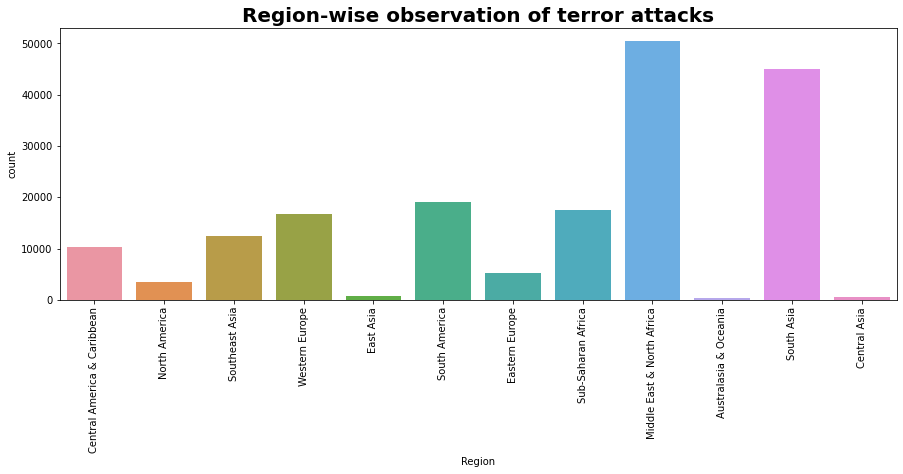

In [109]:
plt.figure(figsize = (15, 5))
sns.countplot(df1['Region'])
plt.xticks(rotation = 90)
plt.title('Region-wise observation of terror attacks', fontsize = 20, weight = 'bold')

**From the above plot, we can make out that Middle East & North Africa regions have the highest terror incidents followed by Sout Asia region.**

## Analysis of Number of terror attacks happened V/S No. Of People Damaged.

In [22]:
df1['Damage'] = df1['Nkill'] + df1['Nwound']

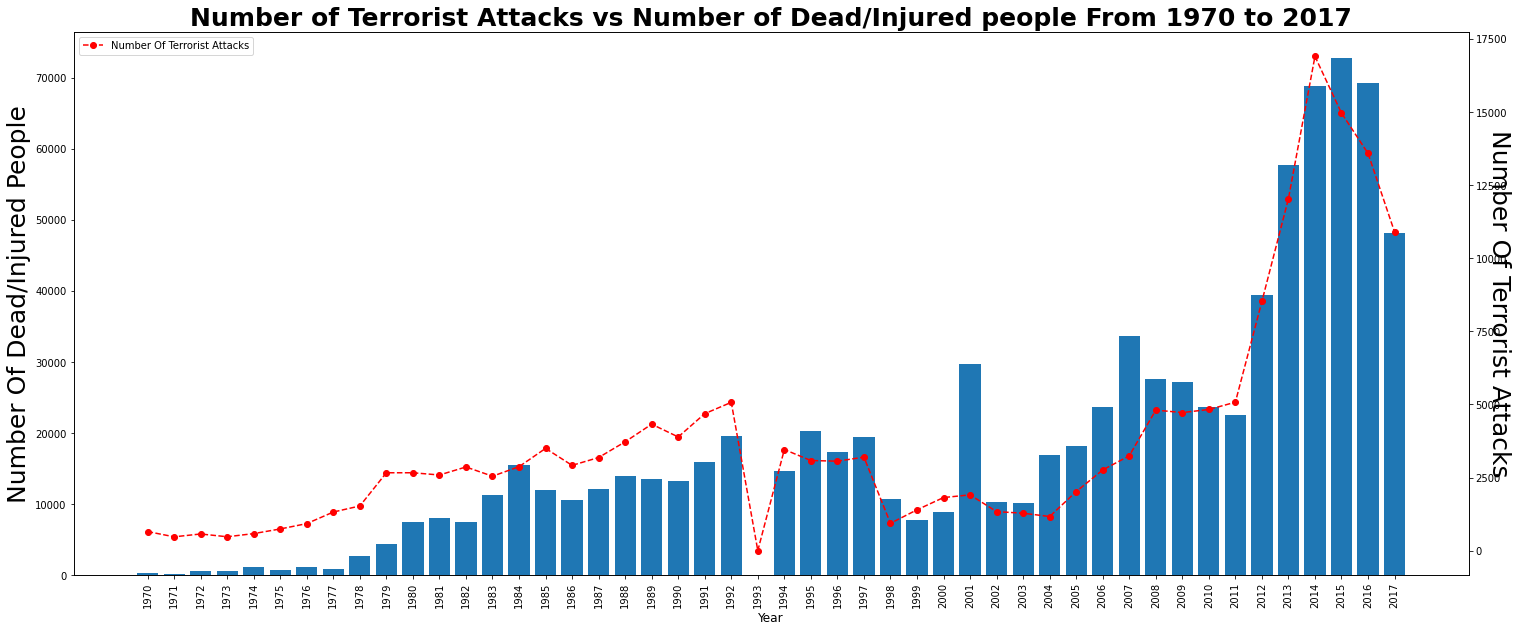

In [150]:
people_damage = df1[["Year","Damage"]].groupby('Year').sum()
list_of_years = df1['Year'].unique().tolist()

#ploting the bar graph
fig, ax1 = plt.subplots(figsize = (25,10))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values] )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 25)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 25, weight ='bold')
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_of_years:
    number_attack.append(len(df1[df1['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 25,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

Text(0.5, 0, 'Years')

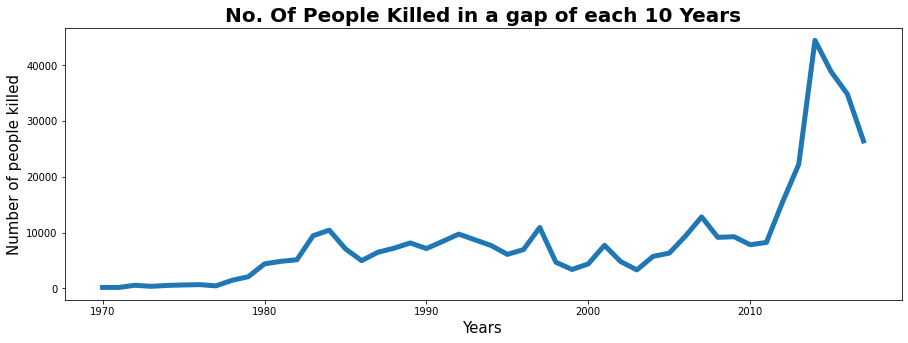

In [171]:
plt.figure(figsize = (15, 5))
df1['Nkill'].groupby(df1['Year']).sum().plot(kind = 'line', lw= 5)
plt.title("No. Of People Killed in a gap of each 10 Years", fontsize = 20, weight = 'bold')
plt.ylabel('Number of people killed', fontsize = 15)
plt.xlabel('Years', fontsize = 15)

**From the above plotting, one can note that, maximum lives have lost during a terror attack in the Year Gap 2010 to 2017. While one can also notice te moderate killing of people during the Year Gap of 1980 to 2000.**

## Visualizing Terrorist Attacktypes

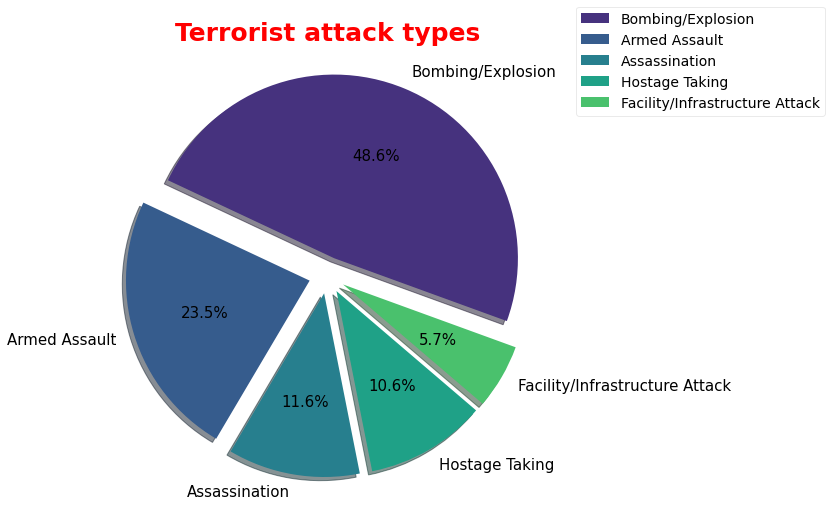

In [334]:
atk_filtered =df1['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination', 'Hostage Taking','Facility/Infrastructure Attack']

sizes = []

for i in attack_type:
    percent = i*100/len(df1['Attacktype'])
    sizes.append(percent)

plt.subplots(figsize=(10,10))
plt.pie(sizes, autopct='%1.1f%%', labels = labels,
        startangle = -20, shadow = True,
        colors = sns.color_palette("viridis"), textprops = {'fontsize': 15, 'weight':'light'}, explode = (0.1,0.1,0.1,0.1,0.1))


plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', color = 'red') 
             
plt.tight_layout()
plt.legend(loc = 'upper right', prop={'size': 14}, framealpha = 0.4, bbox_to_anchor=(1.5,0.1,0.1,1))
fig.show()

**From the above plot, we come to a observation that Attacking type of Bombing/Explosion consisting of 48.6% is highest occuring attack types, whereas the lowest is 5.7% i.e. Facility / Infrastructure Attack.**

## Visualizing Terrorist Weapons

In [296]:
df1['Weaptype'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Text(0.5, 1.0, 'Terrorist Weapon Types')

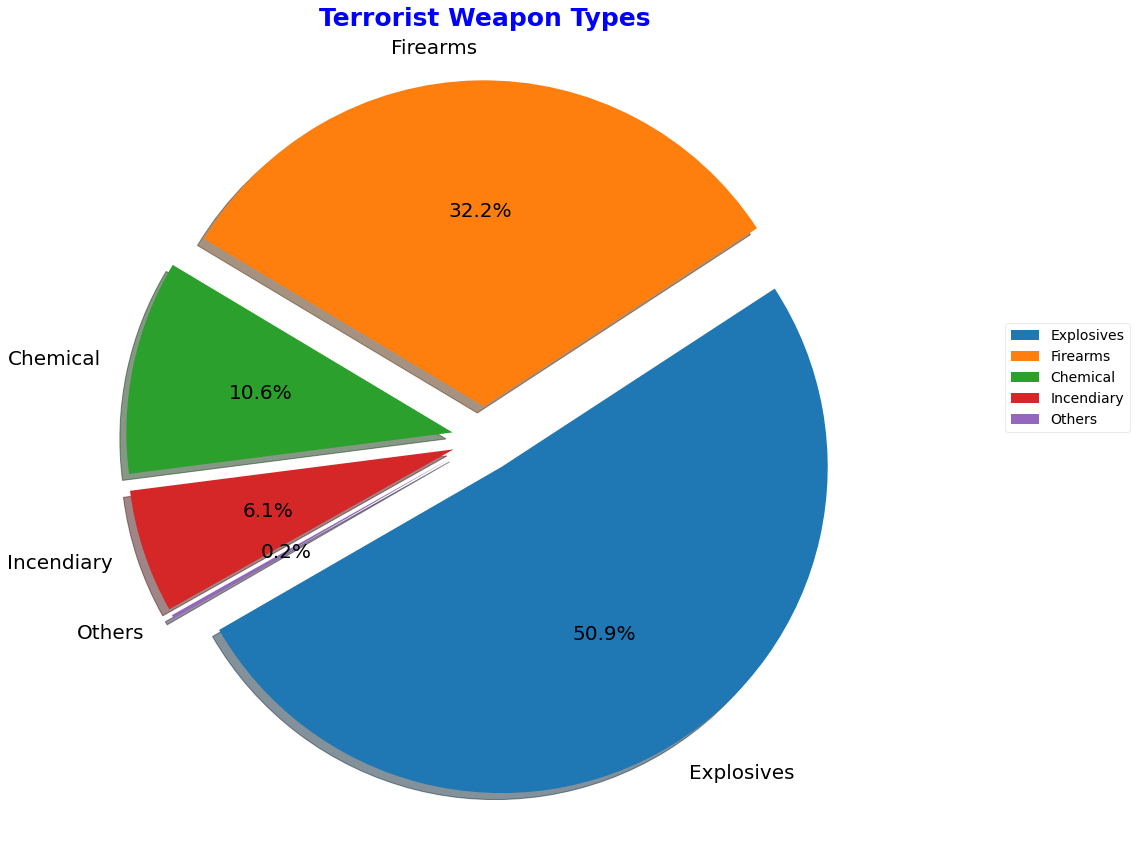

In [340]:
weap_types_filtered = df1['Weaptype'].apply(lambda y:y if y in ['Explosives', 'Firearms', 'Chemical', 'Incendiary'] else 'Others')
weap_types = weap_types_filtered.value_counts().tolist()

weap_sizes = []

weap_labels = ['Explosives', 'Firearms', 'Chemical', 'Incendiary', 'Others']

for i in weap_types:
    percentage = i*100/len(df1['Weaptype'])
    weap_sizes.append(percentage)

plt.subplots(figsize = (20, 15))
plt.pie(weap_sizes, labels = weap_labels, shadow = True, autopct = '%1.1f%%', startangle = -150, textprops = {'weight':'light', 'size':20}, explode = (0.1, 0.1, 0.1, 0.1, 0.1))
plt.legend(loc = 'lower right', prop = {'size' : 14}, framealpha = 0.4, bbox_to_anchor = (1.2, 0.5, 0.1, 1))

plt.title("Terrorist Weapon Types", fontsize = 25, color = 'blue', weight = 'bold')

**From the above plot, one can analyze that, terrorists used Explosives highly than any other weapon type which is 50.9%, also the least stays weapon type Incendiary which consists of 6.1%.**

## Let's have a sneak into Sucess missions of Terrorists on basis of Ratio.

***0--> Unsuccessfull and 1 <-- Successfull***

<AxesSubplot:>

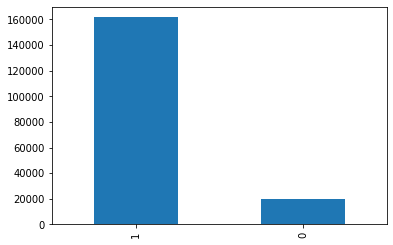

In [343]:
df1['Success'].value_counts().plot.bar()

**Based on the bar plot above, the terrorists have planed well, and made a successsfull way to accomplish their missions as the ratio between the success and failures doesnt sum up well, they were always successfull these many years.**

# Let's check how Terrorist Attacks happened since 2000.

In [356]:
df_greaterthan_2000 = df1[df1['Year'] > 2000]

Text(0.5, 1.0, 'How many attacks happened since 2000?')

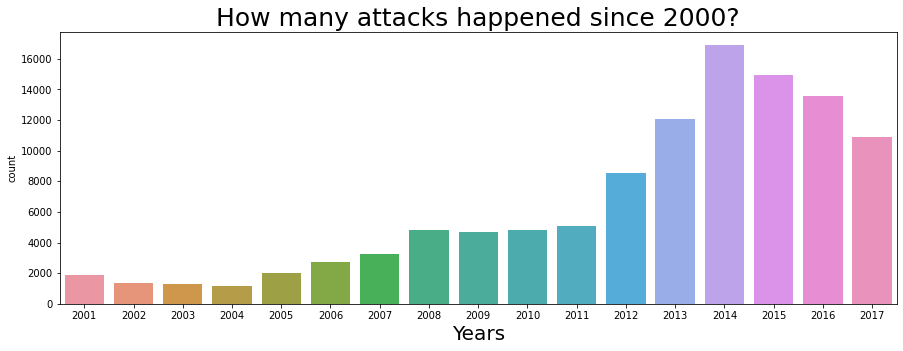

In [363]:
plt.figure(figsize = (15, 5))
sns.countplot(df_greaterthan_2000['Year'])
plt.xlabel('Years', fontsize = 20)
plt.title('How many attacks happened since 2000?', fontsize = 25)

# Let's check on how  much India has been affected on behalf of terrorism.

In [47]:
df_country_india = df1[df1['Country'] == 'India']
df_country_india

,Eventid,Year,Month,Day,Extended,Resolution,Attacktype,Country,Region,Provstate,...,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Success,Suicide,Crit1,Crit2,Crit3
1186,197202220004,1972,2,22,0,NaN,Hijacking,India,South Asia,Delhi,...,0.0,NaN,Explosives,0.0,0.0,1,0,1,1,1
2764,197501190004,1975,1,2,0,NaN,Bombing/Explosion,India,South Asia,Bihar,...,1.0,0.0,Explosives,4.0,0.0,1,0,1,1,1
3857,197605260001,1976,5,26,0,NaN,Bombing/Explosion,India,South Asia,Delhi,...,0.0,NaN,Explosives,0.0,0.0,1,0,1,1,1
5327,197709280004,1977,9,28,0,NaN,Hijacking,India,South Asia,Maharashtra,...,0.0,NaN,Firearms,0.0,0.0,1,0,1,1,1
7337,197901130004,1979,1,13,0,NaN,Armed Assault,India,South Asia,Assam,...,0.0,NaN,Firearms,NaN,NaN,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,0,NaN,Bombing/Explosion,India,South Asia,Kerala,...,0.0,0.0,Explosives,0.0,0.0,1,0,1,1,1
181665,201712300023,2017,12,30,0,NaN,Facility/Infrastructure Attack,India,South Asia,Chhattisgarh,...,0.0,0.0,Firearms,0.0,0.0,1,0,1,1,1
181672,201712310005,2017,12,31,0,NaN,Armed Assault,India,South Asia,Jammu and Kashmir,...,0.0,1.0,Explosives,8.0,3.0,1,1,1,1,1
181684,201712310019,2017,12,31,0,NaN,Hostage Taking (Kidnapping),India,South Asia,Assam,...,0.0,0.0,Firearms,0.0,0.0,1,0,1,1,1


In [15]:
df1[df1['Country'] == 'India']['Attacktype'].value_counts()

Bombing/Explosion                      4825
Armed Assault                          3184
Assassination                          1229
Hostage Taking (Kidnapping)            1184
Facility/Infrastructure Attack          996
Unknown                                 312
Unarmed Assault                         143
Hostage Taking (Barricade Incident)      44
Hijacking                                43
Name: Attacktype, dtype: int64

In [27]:
df_india = df1[df1['Country'] == 'India']['Provstate'].value_counts()
df_india

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Telangana              24
Uttaranchal            24
Himachal Pradesh       24
Arunachal Pradesh      24
Goa                     5
Sikkim                  4
Puducherry              2
Name: Provstate, dtype: int64

Text(0.5, 1.0, 'Terrorism affect on India since 1970')

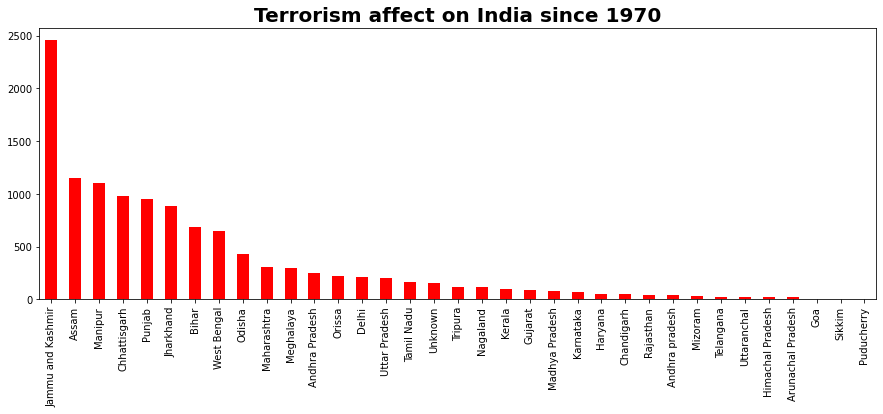

In [34]:
plt.figure(figsize = (15, 5))
df_india.plot(kind = 'bar', color = 'red')
plt.title('Terrorism affect on India since 1970', fontsize = 20, weight = 'bold')

**Here, from the above barplot, one can say that, India has been prey of Terrorism since 1970, and the most affected ProvState in India is 'Jammu & Kashmir', the least stays the eastern parts of India i.e. 'Arunachal Pradesh', also, there are few states namely 'Goa', 'Sikkhim', 'Puducherry' where there isn't a single terrorist attack happened till date.**

**Provstates like 'Assam', 'Manipur', 'Chattisgarh', 'Punjab' 'Jharkhand' have been moderately attacked by terrorists.**

# Number of Indians killed since 1970

Text(0.5, 1.0, 'Number of Indians killed since 1970 due to Terror Attacks')

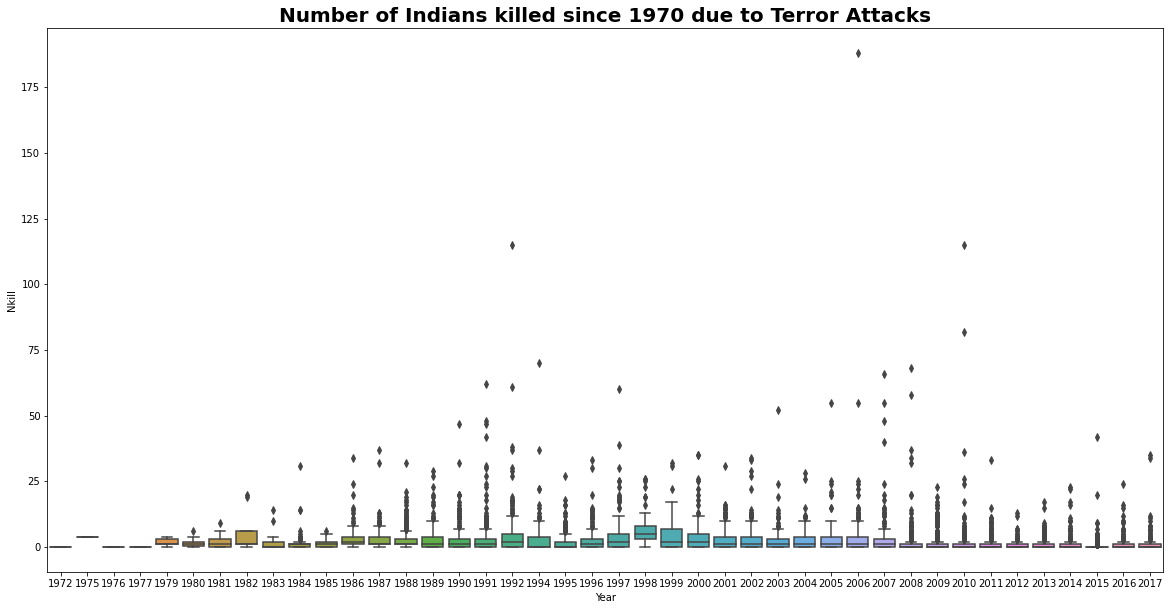

In [92]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'Year', y = 'Nkill', data = df_country_india)
plt.title('Number of Indians killed since 1970 due to Terror Attacks', fontsize = 20, weight = 'bold', color = 'black')

In [107]:
df_country_india[['Nkill','Year']].value_counts()

Nkill  Year
0.0    2016    731
       2017    693
       2015    642
       2014    589
       2013    454
              ... 
14.0   2002      1
       2003      1
       2006      1
       2007      1
188.0  2006      1
Length: 610, dtype: int64

**From the above plot and the cell, one can observe that, highest number of people killed in India were in the Year 2006.**

In [110]:
df_claimed = df1['Claimed'].dropna()

Text(0.5, 1.0, 'Claimed whether the terrorists accept they have done the attack or not')

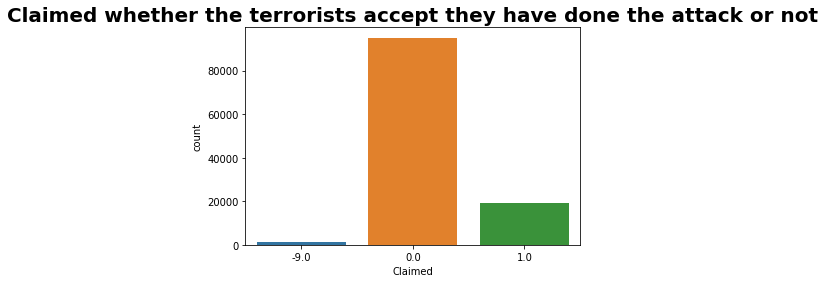

In [116]:
sns.countplot(df_claimed)
plt.title("Claimed whether the terrorists accept they have done the attack or not", fontsize = 20, weight = 'bold')
# claims are not taken to be more certain.
# more than 80000 claims arent accepted by terrorists.
# 0 <-- not accepting claim 1 --> accepting the claim.

Text(0.5, 1.0, 'No. of people killed all these years because of terrorism.')

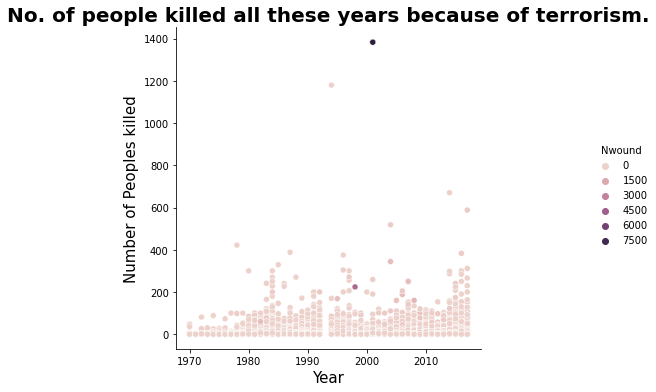

In [121]:
sns.relplot(x = 'Year', y = 'Nkill', hue = 'Nwound', data = df1)
plt.ylabel('Number of Peoples killed', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.title('No. of people killed all these years because of terrorism.', fontsize = 20, weight = 'bold')

# Let's have a look on rescue of hostages.

Text(0.5, 1.0, 'Observations of number of hostages rescued or not')

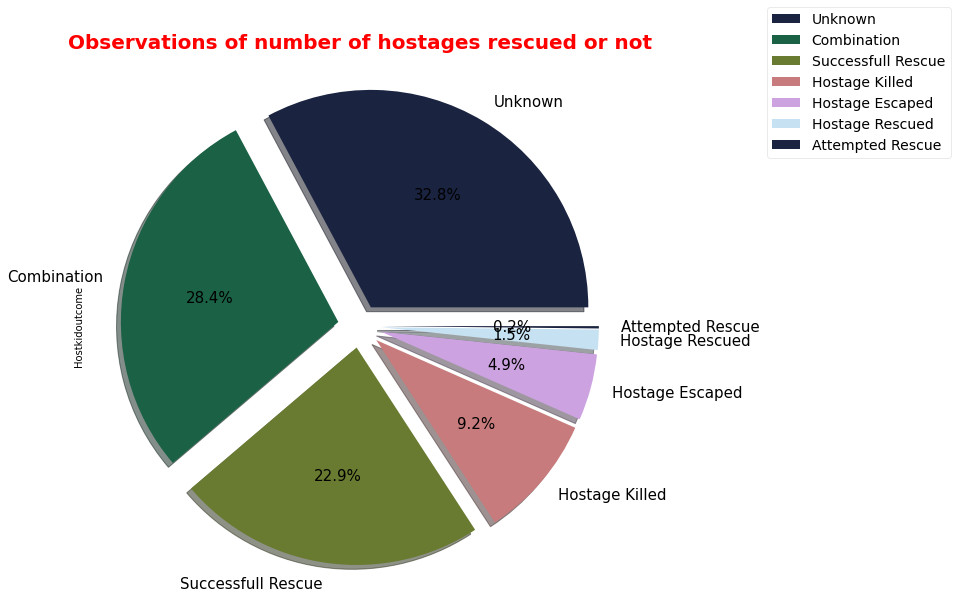

In [141]:
plt.subplots(figsize = (20, 10))
df_hostkid = df['Hostkidoutcome'].value_counts()

labels = ['Unknown', 'Combination', 'Successfull Rescue', 'Hostage Killed','Hostage Escaped', 'Hostage Rescued', 'Attempted Rescue']
df_hostkid.plot.pie(shadow = True, autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1), labels = labels,  colors = sns.color_palette("cubehelix"), textprops =  {'weight' : 'light', 'size': 15})
plt.legend(prop={'size': 14}, framealpha = 0.4, bbox_to_anchor=(1.5,0.1,0.1,1))
plt.title('Observations of number of hostages rescued or not', fontsize = 20, color = 'red', weight = 'bold')


In [139]:
df_hostkid

7.0    3606
2.0    3124
4.0    2522
6.0    1013
5.0     542
3.0     165
1.0      19
Name: Hostkidoutcome, dtype: int64

# Let's have a look on how much nations are free from terrorism since 2000

In [30]:
country_damage = df1[df1['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
country_damage[country_damage['Damage'] == 0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


**From the above plot, we can get that above nations were free from terrorism since 2000.**